### Homework 1
------------------
**Building**
Szymon Gut, Jan Krężel

In [17]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split

#### Splitting the data for validation purposes

In [18]:
data = pd.read_csv("german_credit_data_dataset.csv")
X_train, X_test = train_test_split(np.arange(len(data)), test_size = 0.3, random_state=42)
df = data.iloc[X_train]

## 0. Data Overview

#### sample

In [20]:
df

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
541,A14,24,A33,A40,2032.0,A61,A75,4.0,A93,A101,...,A124,60.0,A143,A153,2.0,A173,1,A192,A201,1
440,A14,12,A32,A40,1884.0,A61,A75,4.0,A93,A101,...,A123,39.0,A143,A152,1.0,A174,1,A192,A201,1
482,A11,30,A32,A42,3622.0,A64,A75,4.0,A92,A101,...,A122,57.0,A143,A151,2.0,A173,1,A192,A201,1
422,A12,12,A34,A40,958.0,A61,A74,2.0,A93,A101,...,A121,47.0,A143,A152,2.0,A172,2,A191,A201,1
778,A14,36,A34,A41,5711.0,A64,A75,4.0,A93,A101,...,A123,38.0,A143,A152,2.0,A174,1,A192,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,A14,18,A31,A40,6458.0,A61,A75,2.0,A93,A101,...,A124,39.0,A141,A152,2.0,A174,2,A192,A201,2
270,A14,18,A32,A40,2662.0,A65,A74,4.0,A93,A101,...,A122,32.0,A143,A152,1.0,A173,1,A191,A202,1
860,A14,24,A34,A41,5804.0,A64,A73,4.0,A93,A101,...,A121,27.0,A143,A152,2.0,A173,1,A191,A201,1
435,A12,12,A32,A43,1484.0,A65,A73,2.0,A94,A101,...,A121,25.0,A143,A152,1.0,A173,1,A192,A201,2


#### Attribute Details

|name                   |type   |description                                                                                                                                                                                                                                             |
|-----------------------|-------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|checking_account_status|string |Status of existing checking account (A11: < 0 DM, A12: 0 <= x < 200 DM, A13 : >= 200 DM / salary assignments for at least 1 year, A14 : no checking account)                                                                                            |
|duration               |integer|Duration in month                                                                                                                                                                                                                                       |
|credit_history         |string |A30: no credits taken/ all credits paid back duly, A31: all credits at this bank paid back duly, A32: existing credits paid back duly till now, A33: delay in paying off in the past, A34 : critical account/ other credits existing (not at this bank) |
|purpose                |string |Purpose of Credit (A40 : car (new), A41 : car (used), A42 : furniture/equipment, A43 : radio/television, A44 : domestic appliances, A45 : repairs, A46 : education, A47 : (vacation - does not exist?), A48 : retraining, A49 : business, A410 : others)|
|credit_amount          |float  |                                                                                                                                                                                                                                                        |
|savings                |string |Savings in accounts/bonds (A61 : < 100 DM, A62 : 100 <= x < 500 DM, A63 : 500 <= x < 1000 DM, A64 : >= 1000 DM, A65 : unknown/ no savings account                                                                                                       |
|present_employment     |string |A71 : unemployed, A72 : < 1 year, A73 : 1 <= x < 4 years, A74 : 4 <= x < 7 years, A75 : .. >= 7 years                                                                                                                                                   |
|installment_rate       |float  |Installment Rate in percentage of disposable income                                                                                                                                                                                                     |
|personal               |string |Personal Marital Status and Sex (A91 : male : divorced/separated, A92 : female : divorced/separated/married, A93 : male : single, A94 : male : married/widowed, A95 : female : single)                                                                  |
|other_debtors          |string |A101 : none, A102 : co-applicant, A103 : guarantor                                                                                                                                                                                                      |
|present_residence      |float  |Present residence since                                                                                                                                                                                                                                 |
|property               |string |A121 : real estate, A122 : if not A121 : building society savings agreement/ life insurance, A123 : if not A121/A122 : car or other, not in attribute 6, A124 : unknown / no property                                                                   |
|age                    |float  |Age in years                                                                                                                                                                                                                                            |
|other_installment_plans|string |A141 : bank, A142 : stores, A143 : none                                                                                                                                                                                                                 |
|housing                |string |A151 : rent, A152 : own, A153 : for free                                                                                                                                                                                                                |
|existing_credits       |float  |number of existing credits at this bank                                                                                                                                                                                                                 |
|job                    |string |A171 : unemployed/ unskilled - non-resident,A172 : unskilled - resident,A173 : skilled employee / official,A174 : management/ self-employed/highly qualified employee/ officer                                                                          |
|dependents             |integer|Number of people being liable to provide maintenance for                                                                                                                                                                                                |
|telephone              |string |A191 : none, A192 : yes, registered under the customers name                                                                                                                                                                                            |
|foreign_worker         |string |A201: yes, A202: no                                                                                                                                                                                                                                     |
|customer_type          |integer|Predictor Class: 1=Good, 2=Bad                                                                                                                                                                                                                          |


In [21]:
df.describe()

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,21.252857,3406.815714,2.981429,2.834286,35.492857,1.420000,1.137143,1.298571
std,11.900051,2971.897408,1.118679,1.103238,11.253037,0.581695,0.344244,0.457959
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1381.750000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2332.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,4226.000000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 541 to 102
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_account_status  700 non-null    object 
 1   duration                 700 non-null    int64  
 2   credit_history           700 non-null    object 
 3   purpose                  700 non-null    object 
 4   credit_amount            700 non-null    float64
 5   savings                  700 non-null    object 
 6   present_employment       700 non-null    object 
 7   installment_rate         700 non-null    float64
 8   personal                 700 non-null    object 
 9   other_debtors            700 non-null    object 
 10  present_residence        700 non-null    float64
 11  property                 700 non-null    object 
 12  age                      700 non-null    float64
 13  other_installment_plans  700 non-null    object 
 14  housing                 

There is no empty rows. It is because author said that Missing values are filled in with '?' for nominal and -100000 for numerical attributes.
So let's check if there is any row with these present.

In [23]:
len(df[df.isin(['?']).any(axis=1)])

0

In [24]:
len(df[df.isin([-100000]).any(axis=1)])

0

There are, in fact, no missing values in this dataset.

## 1. Quantitative Attribute distribution

<function matplotlib.pyplot.show(close=None, block=None)>

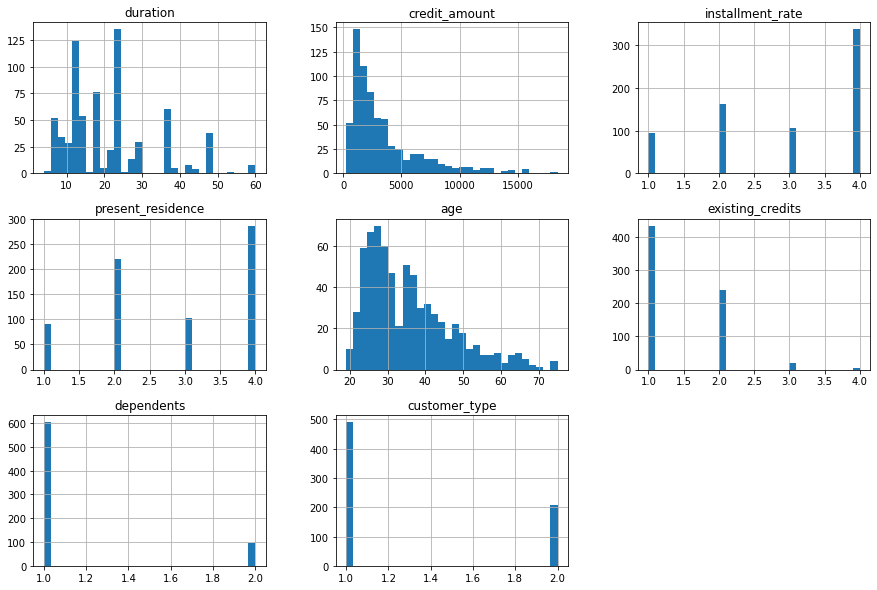

In [25]:
df.hist(bins=30, figsize=(15, 10))
plt.show

Most numeric attributes have only a few unique values. However it can still be observed that all distributions are somewhat skewed.
Duration, credit_amount and age have a lot more unique values and are definitely skewed (especially the latter two).

In [26]:
df.duplicated().sum()

0

There are no duplicated rows

## 2. How many zeros?


In [28]:
cols = ['duration', 'credit_amount', 'installment_rate', 'present_residence', 'age', 'existing_credits', 'dependents', 'customer_type']
(df[cols] == 0).sum(axis = 0)

duration             0
credit_amount        0
installment_rate     0
present_residence    0
age                  0
existing_credits     0
dependents           0
customer_type        0
dtype: int64

There aren't any 0 values in these columns. Customer type is obvious as it's described to be either 1 or 2.

In [29]:
(df[cols] < 0).sum(axis = 0)

duration             0
credit_amount        0
installment_rate     0
present_residence    0
age                  0
existing_credits     0
dependents           0
customer_type        0
dtype: int64

There also no negative values. All numeric values in this dataset are positive.

## 3. Correlation

<AxesSubplot:>

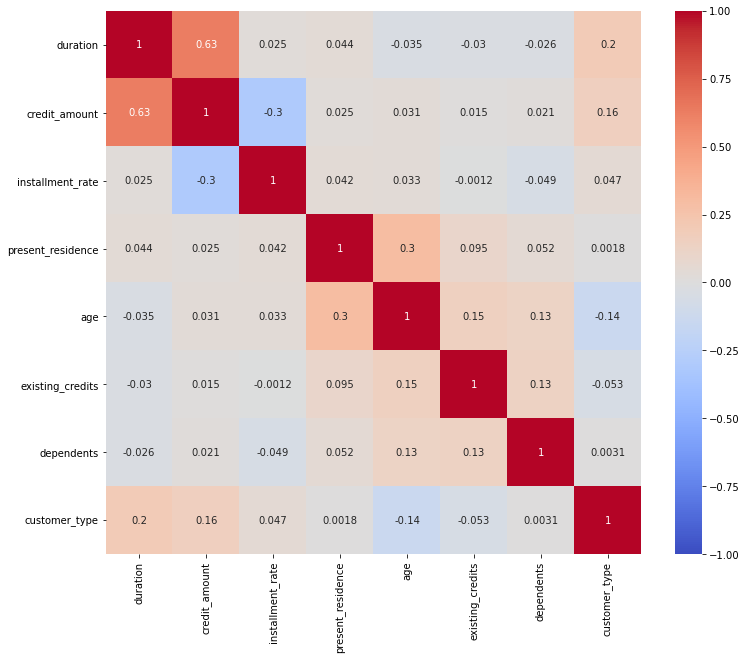

In [30]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot = True)

Highest correlation is between duration and credit_amount. 
Installment_rate and age somewhat correlated with respectively credit_amount and present_residence.
Other attributes aren't as much correlated with each other.

It might be worth considering to remove 'present_residance' and 'dependents' (and possibly installment_rate and existing_credits) attributes as it has almost zero correlation to the dependent variable.

If deemed necessary the posbility of removing either credit_amount or duration might also be considered so as to prevent bad behaviour of the model.

Let's check the correlation between duration and credit_amount on scatter plot and density map

In [31]:
fig = px.scatter(df,x='duration', y='credit_amount',title = "credit_amount vs duration", trendline = "ols")
fig.show()

In [32]:
fig = px.density_contour(df, x="duration", y="credit_amount")
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

## 4. Transformation

The distributions of age and credit amount are skewed. Let's transform it into a normal distribution.

array([[<AxesSubplot:title={'center':'age_norm'}>,
        <AxesSubplot:title={'center':'credit_amount_norm'}>]],
      dtype=object)

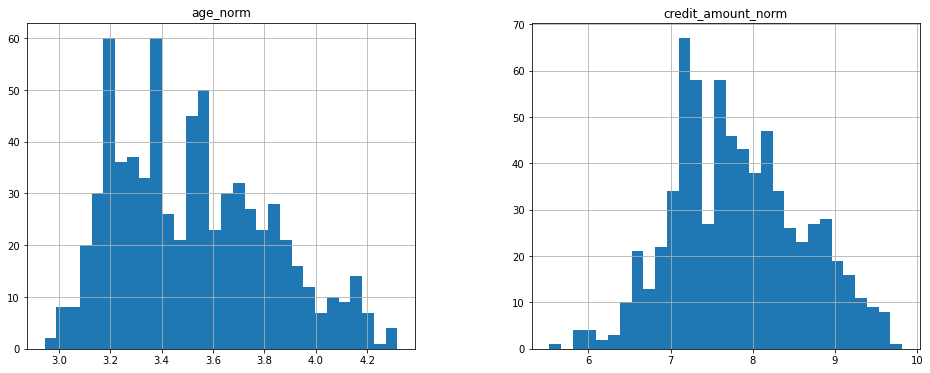

In [37]:
df2 = df
df2 = df2.assign(age_norm = np.log(df['age']))
df2 = df2.assign(credit_amount_norm = np.log(df['credit_amount']))
df2[['age_norm', 'credit_amount_norm']].hist(bins=30, figsize=(16, 6))

## 5. Unique Values

In [38]:
df.nunique() / len(df) * 100

checking_account_status     0.571429
duration                    4.142857
credit_history              0.714286
purpose                     1.428571
credit_amount              95.142857
savings                     0.714286
present_employment          0.714286
installment_rate            0.571429
personal                    0.571429
other_debtors               0.428571
present_residence           0.571429
property                    0.571429
age                         7.571429
other_installment_plans     0.428571
housing                     0.428571
existing_credits            0.571429
job                         0.571429
dependents                  0.285714
telephone                   0.285714
foreign_worker              0.285714
customer_type               0.285714
dtype: float64

As it was previously stated, most attributes have very few unique values with only credit_amount having a large set of possible values.

## 6. Qualitative Attribute Distribution

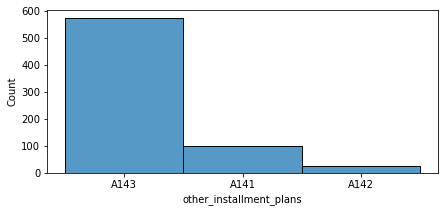

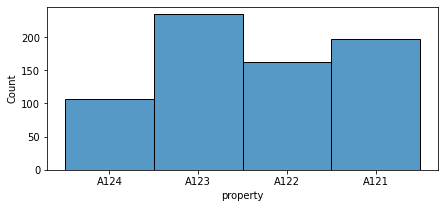

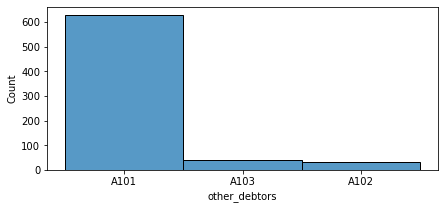

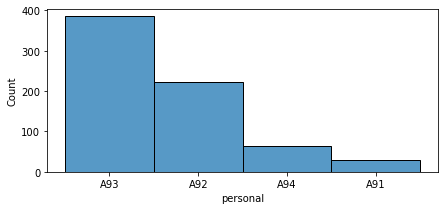

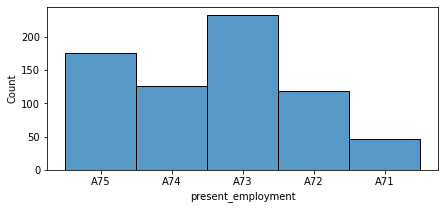

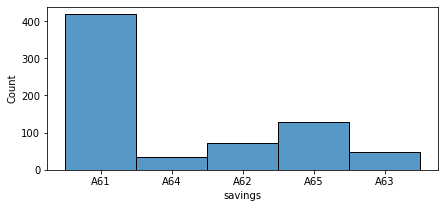

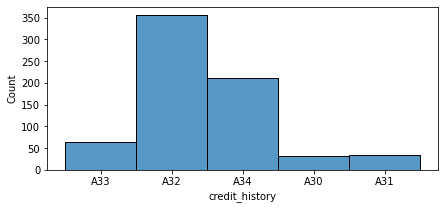

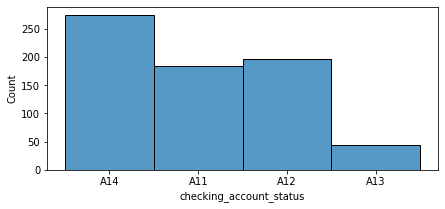

In [39]:
cols = ["other_installment_plans", "property", "other_debtors", "personal", "present_employment", "savings", "credit_history", "checking_account_status"]
for col in cols:
    plt.figure(figsize=(7,3))
    sns.histplot(data=df, x = col)
    plt.show()

# Pandas Profiling
In the next part we will generate a report using Pandas Profiling and discuss its drawbacks.

In [40]:
from pandas_profiling import ProfileReport

In [41]:
df.profile_report()

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]


#### Drawbacks

While the pandas profiling tool is very useful in generating a general overview of the dataset it doesn't provide any insights into the date.
Mainly it only informs us about the types of attributes, their distributions and possible correlation between them.

If we want to look deeper into connections between attributes, their behaviour, their usefulness or the hidden information they may convey we cannot rely on this tool alone.

In other words, pandas profiling is excelent in providing us with a wide variety of information but each piece of information is very shallow. There is no deeper analysis. It enables us to quickly decide which direction we should go in to extract more knowledge from the data without having to go trough the hassle of analysing every single attribute by hand.

Another drawback is the inability of pandas profiling to access the metadata about the set. For example in this EDA we not only looked for missing values but we also looked for any possible encoded missing values ('?' and -100000 values). This tool does not know about such encodings and will happily tell us that there are not missing values in a given data set even though there might many.

To summarise, pandas profiling is a useful stepping stone at the beggining of the EDA but it is not a substitute for it.